In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
def ShowImage(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [9]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i,j]] += 1
    return np.array(hist)

In [10]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col*scale), int(row*scale))
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [11]:
img = cv2.imread(r'C:\Users\Thichanon\Desktop\University\COS3401\Week7-8\images\cameraman.tif', 0)
print(img.shape)

(512, 512)


In [12]:
img = ResizeImage(img, 0.5)
print(img.shape)

(256, 256)


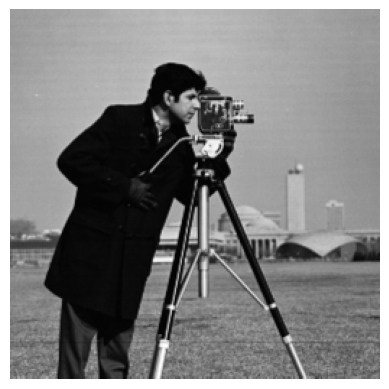

In [13]:
ShowImage(img)

In [14]:
hist = histogram(img)

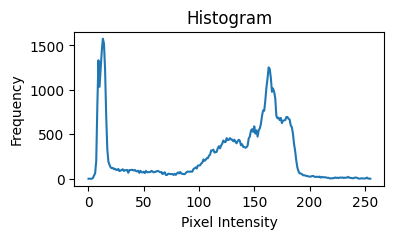

In [16]:
plt.figure(figsize=((4,2)))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [17]:
prob = hist/np.sum(hist)

In [18]:
thresh = 10

In [19]:
w0 = np.sum(prob[:thresh]) + 0.00000001
w1 = np.sum(prob[thresh:]) + 0.00000001

In [20]:
u0 = np.sum(np.array([i for i in range(thresh)])*prob[:thresh])/w0
u1 = np.sum(np.array([i for i in range(thresh,256)])*prob[thresh:])/w1

In [21]:
v_btw = (w0*w1)*np.power (u0-u1, 2)
print(v_btw)

471.25307173509947


In [22]:
def otsu(hist):
    tot = np.sum(hist)
    prob = hist/tot
    coef_max = -1
    thr = -1
    for t in range(1, 256):
        w0 = np.sum(prob[:t]) + 0.00000001
        w1 = np.sum(prob[t:]) + 0.00000001
        i0 = np.array([i for i in range(t)])
        i1 = np.array([i for i in range(t,256)])
        u0 = np.sum(i0*prob[:t])/w0
        u1 = np.sum(i1*prob[t:])/w1

        coef = (w0*w1)*np.power(u0-u1,2)
        if  coef > coef_max:
            coef_max = coef
            thr = t
    return thr

(512, 512)


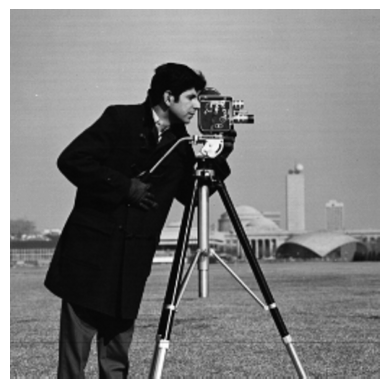

In [23]:
img = cv2.imread(r'C:\Users\Thichanon\Desktop\University\COS3401\Week7-8\images\cameraman.tif', 0)
print(img.shape)
ShowImage(img)

In [ ]:
hist = histogram(img)
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [25]:
thr = otsu(hist)
print(thr)

89


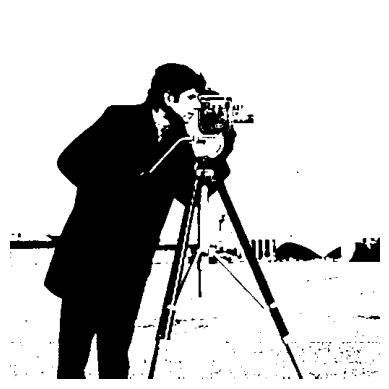

In [27]:
out = np.zeros_like(img)
thresh = thr
out[img >= thresh] = 255
out = out.astype(np.uint8)
ShowImage(out)

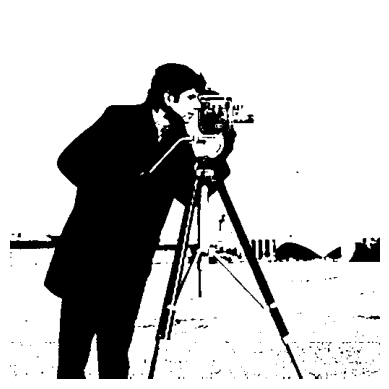

In [28]:
ret, out2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
ShowImage(out2)